# 200968182 LAB 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# EXERCISE 1: EMPLOYMENT

In [2]:
emp = pd.read_csv("C:\\Users\Pravallika Gajul\Downloads\employment.csv",index_col='datestamp',parse_dates=True)
emp 

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


QUESTION 1

In [3]:
emp.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [4]:
emp.isna().any()

Agriculture                       False
Business services                 False
Construction                      False
Durable goods manufacturing       False
Education and Health              False
Finance                           False
Government                        False
Information                       False
Leisure and hospitality           False
Manufacturing                     False
Mining and Extraction             False
Nondurable goods manufacturing    False
Other                             False
Self-employed                     False
Transportation and Utilities      False
Wholesale and Retail Trade        False
dtype: bool

In [5]:
emp.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

There is no missing data in the given data set

QUESTION 2

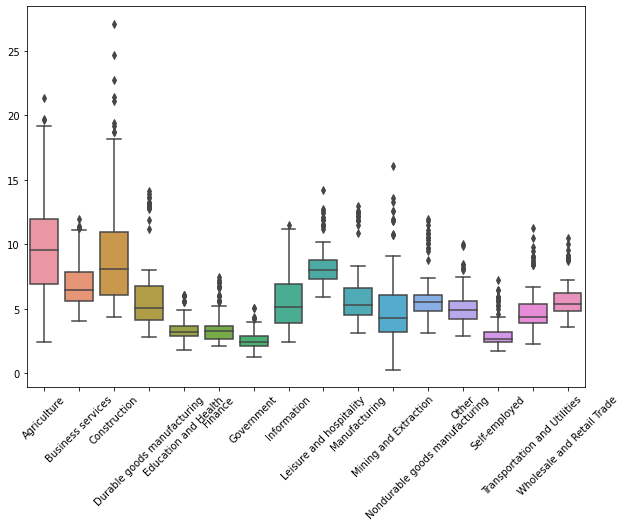

In [6]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(data = emp)
plt.xticks(rotation=45)
plt.show()

QUESTION 3

Text(0.5, 0, 'Year')

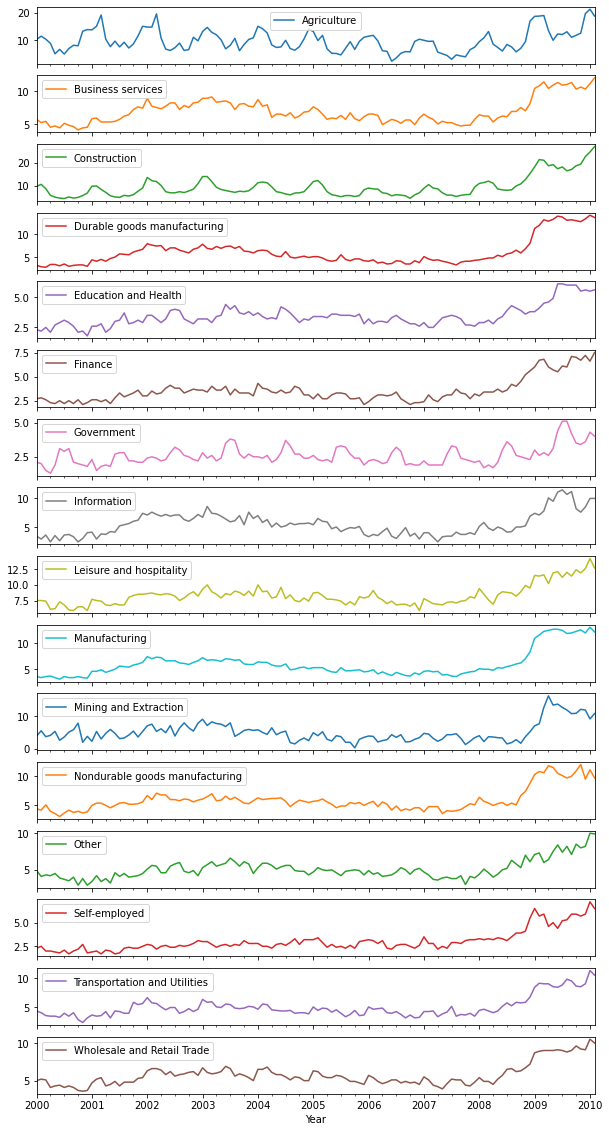

In [7]:
lc = emp.plot(subplots=True, figsize=(10, 20))
plt.xlabel('Year')

QUESTION 4

<ipython-input-8-5201d1426cb7>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  emp.index_month = emp.index.month


<AxesSubplot:xlabel='datestamp'>

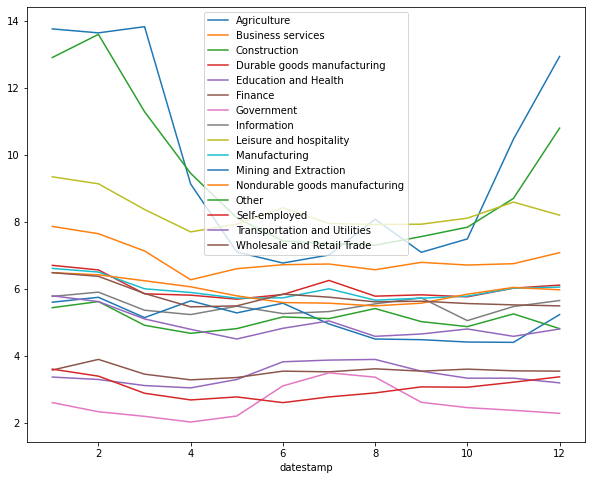

In [8]:
emp.index_month = emp.index.month
df_month = emp.groupby(emp.index_month).mean()

df_month.plot(figsize=(10,8))

<ipython-input-9-f3a42d5aaa3b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  emp.index_year = emp.index.year


<AxesSubplot:xlabel='datestamp'>

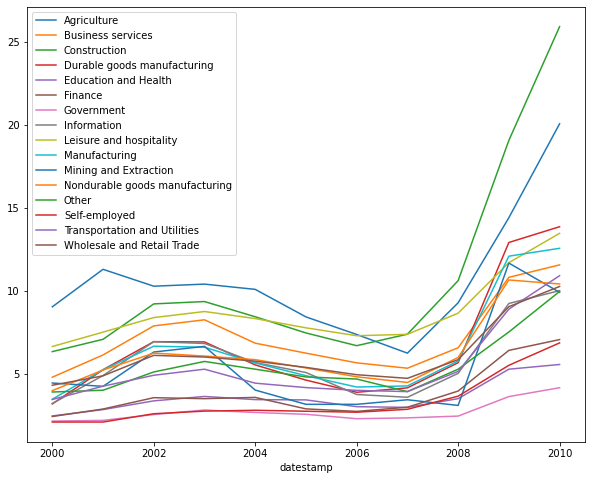

In [9]:
emp.index_year = emp.index.year
df_year = emp.groupby(emp.index_year).mean()

df_year.plot(figsize=(10,8))

QUESTION 5

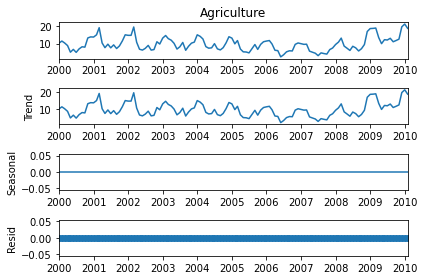

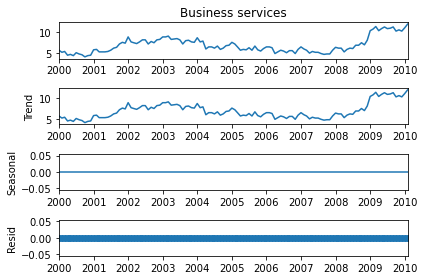

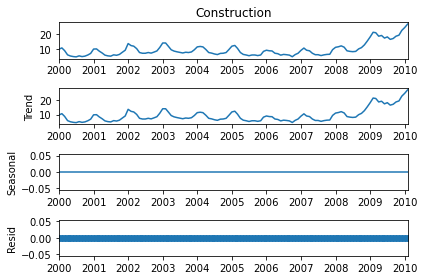

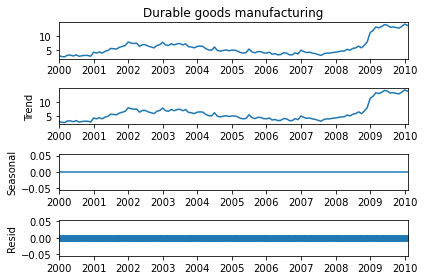

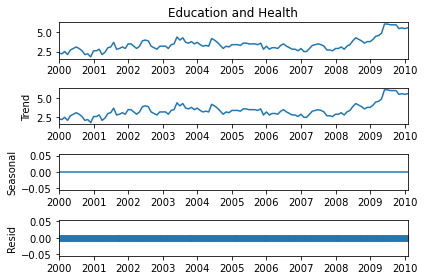

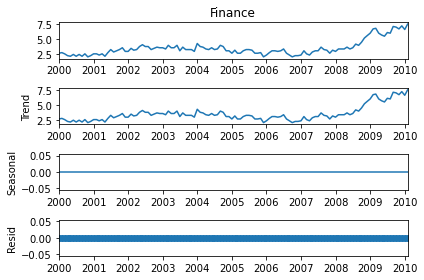

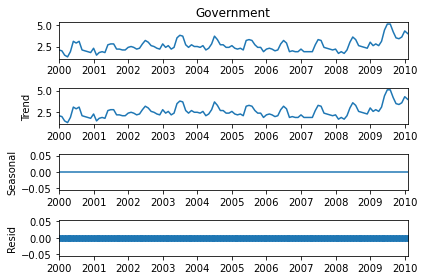

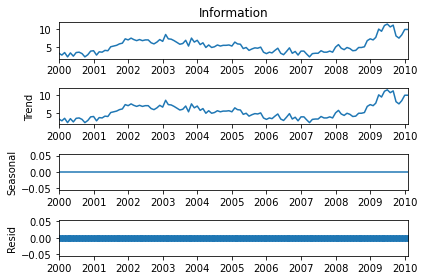

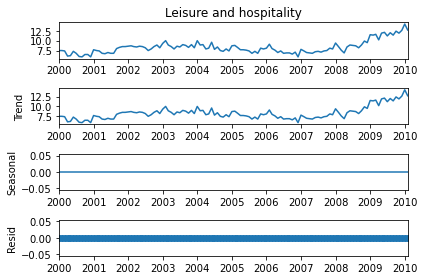

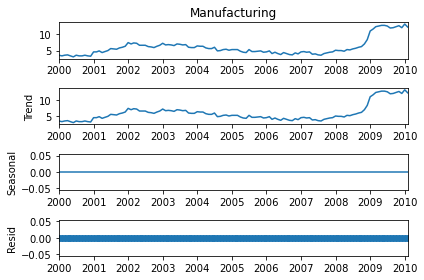

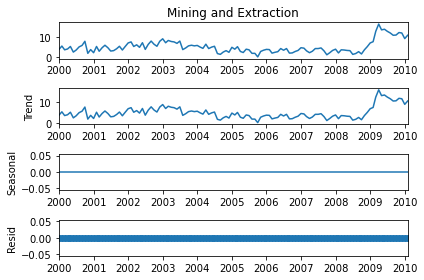

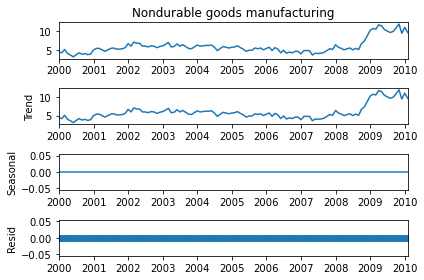

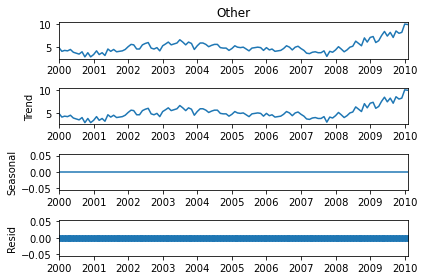

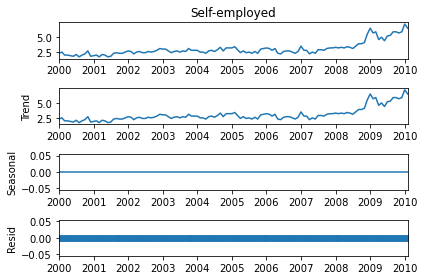

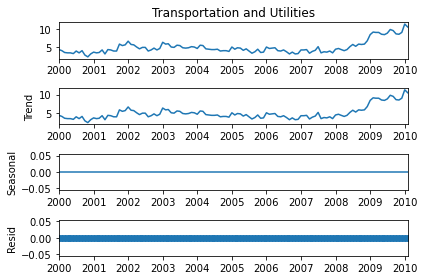

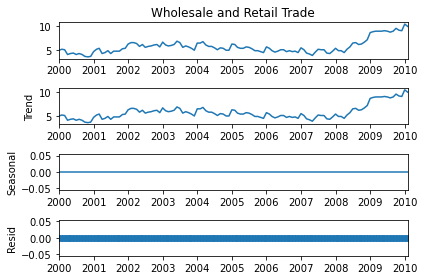

In [10]:
result_monthly = []

for i, col in enumerate(list(emp.columns)):
    result_monthly.append(seasonal_decompose(emp[col], period = 1))
    result_monthly[i].plot()

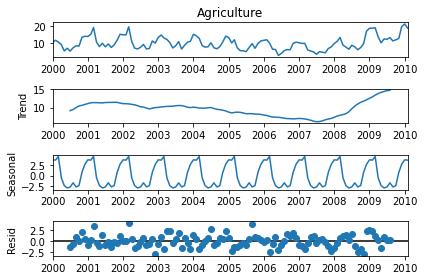

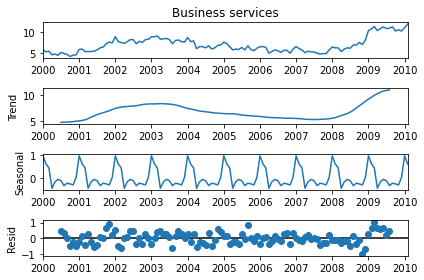

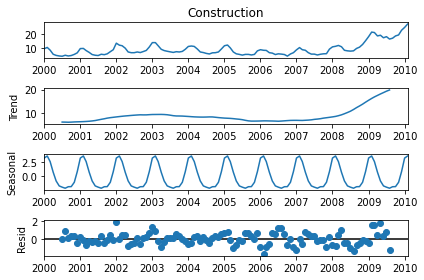

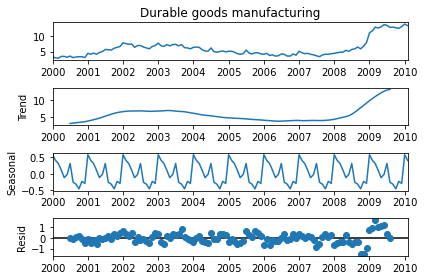

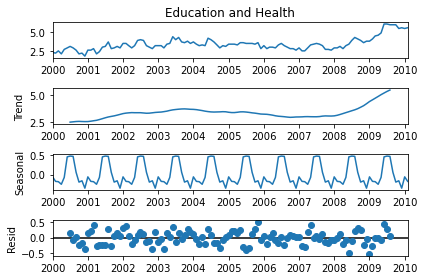

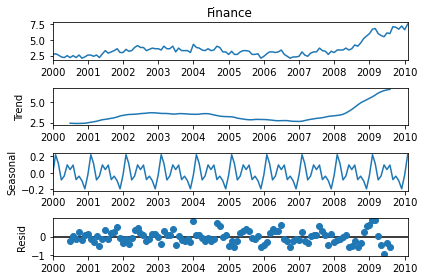

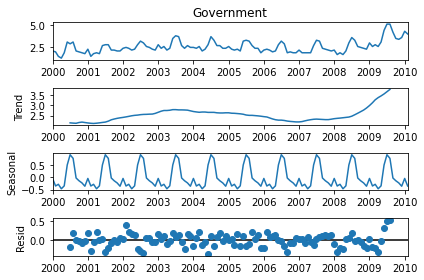

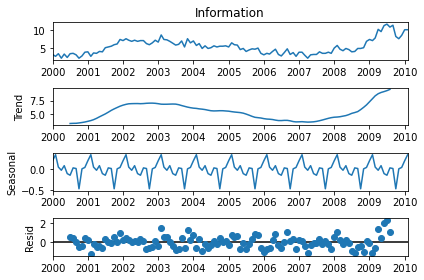

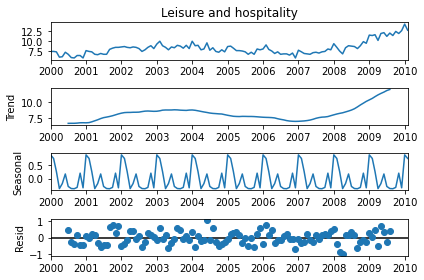

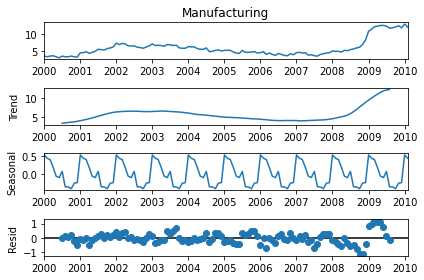

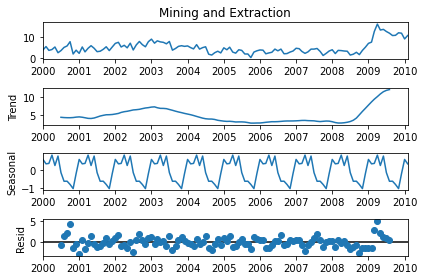

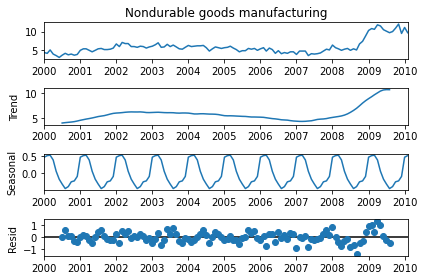

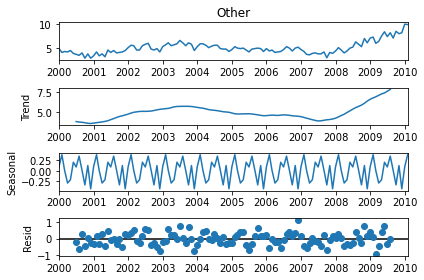

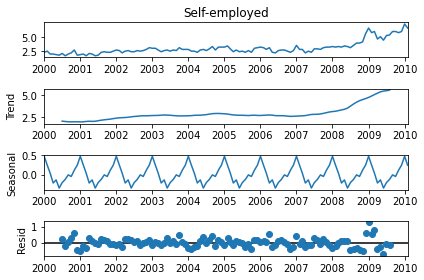

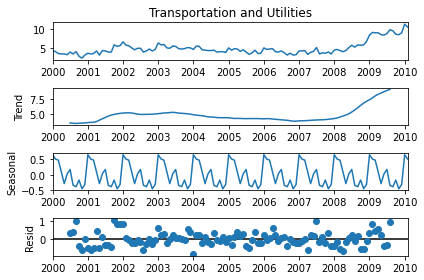

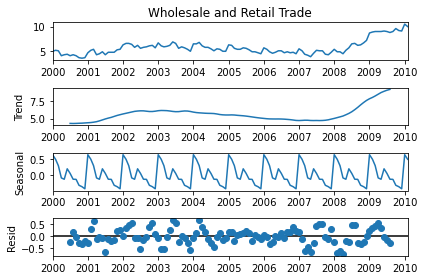

In [11]:
result_yearly = []

for i, col in enumerate(list(emp.columns)):
    result_yearly.append(seasonal_decompose(emp[col], period = 12))
    result_yearly[i].plot()

QUESTION 6

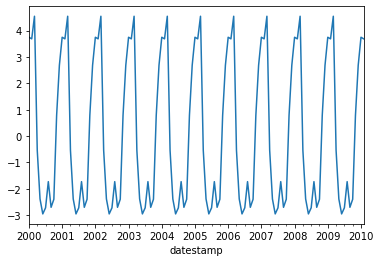

In [12]:
res = seasonal_decompose(emp['Agriculture'])
res.seasonal.plot()
plt.show()

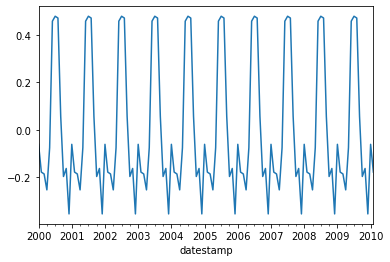

In [13]:
res = seasonal_decompose(emp['Education and Health'])
res.seasonal.plot()
plt.show()

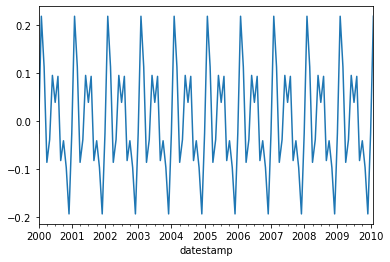

In [14]:
res = seasonal_decompose(emp['Finance'])
res.seasonal.plot()
plt.show()

QUESTION 7

<Figure size 1080x720 with 0 Axes>

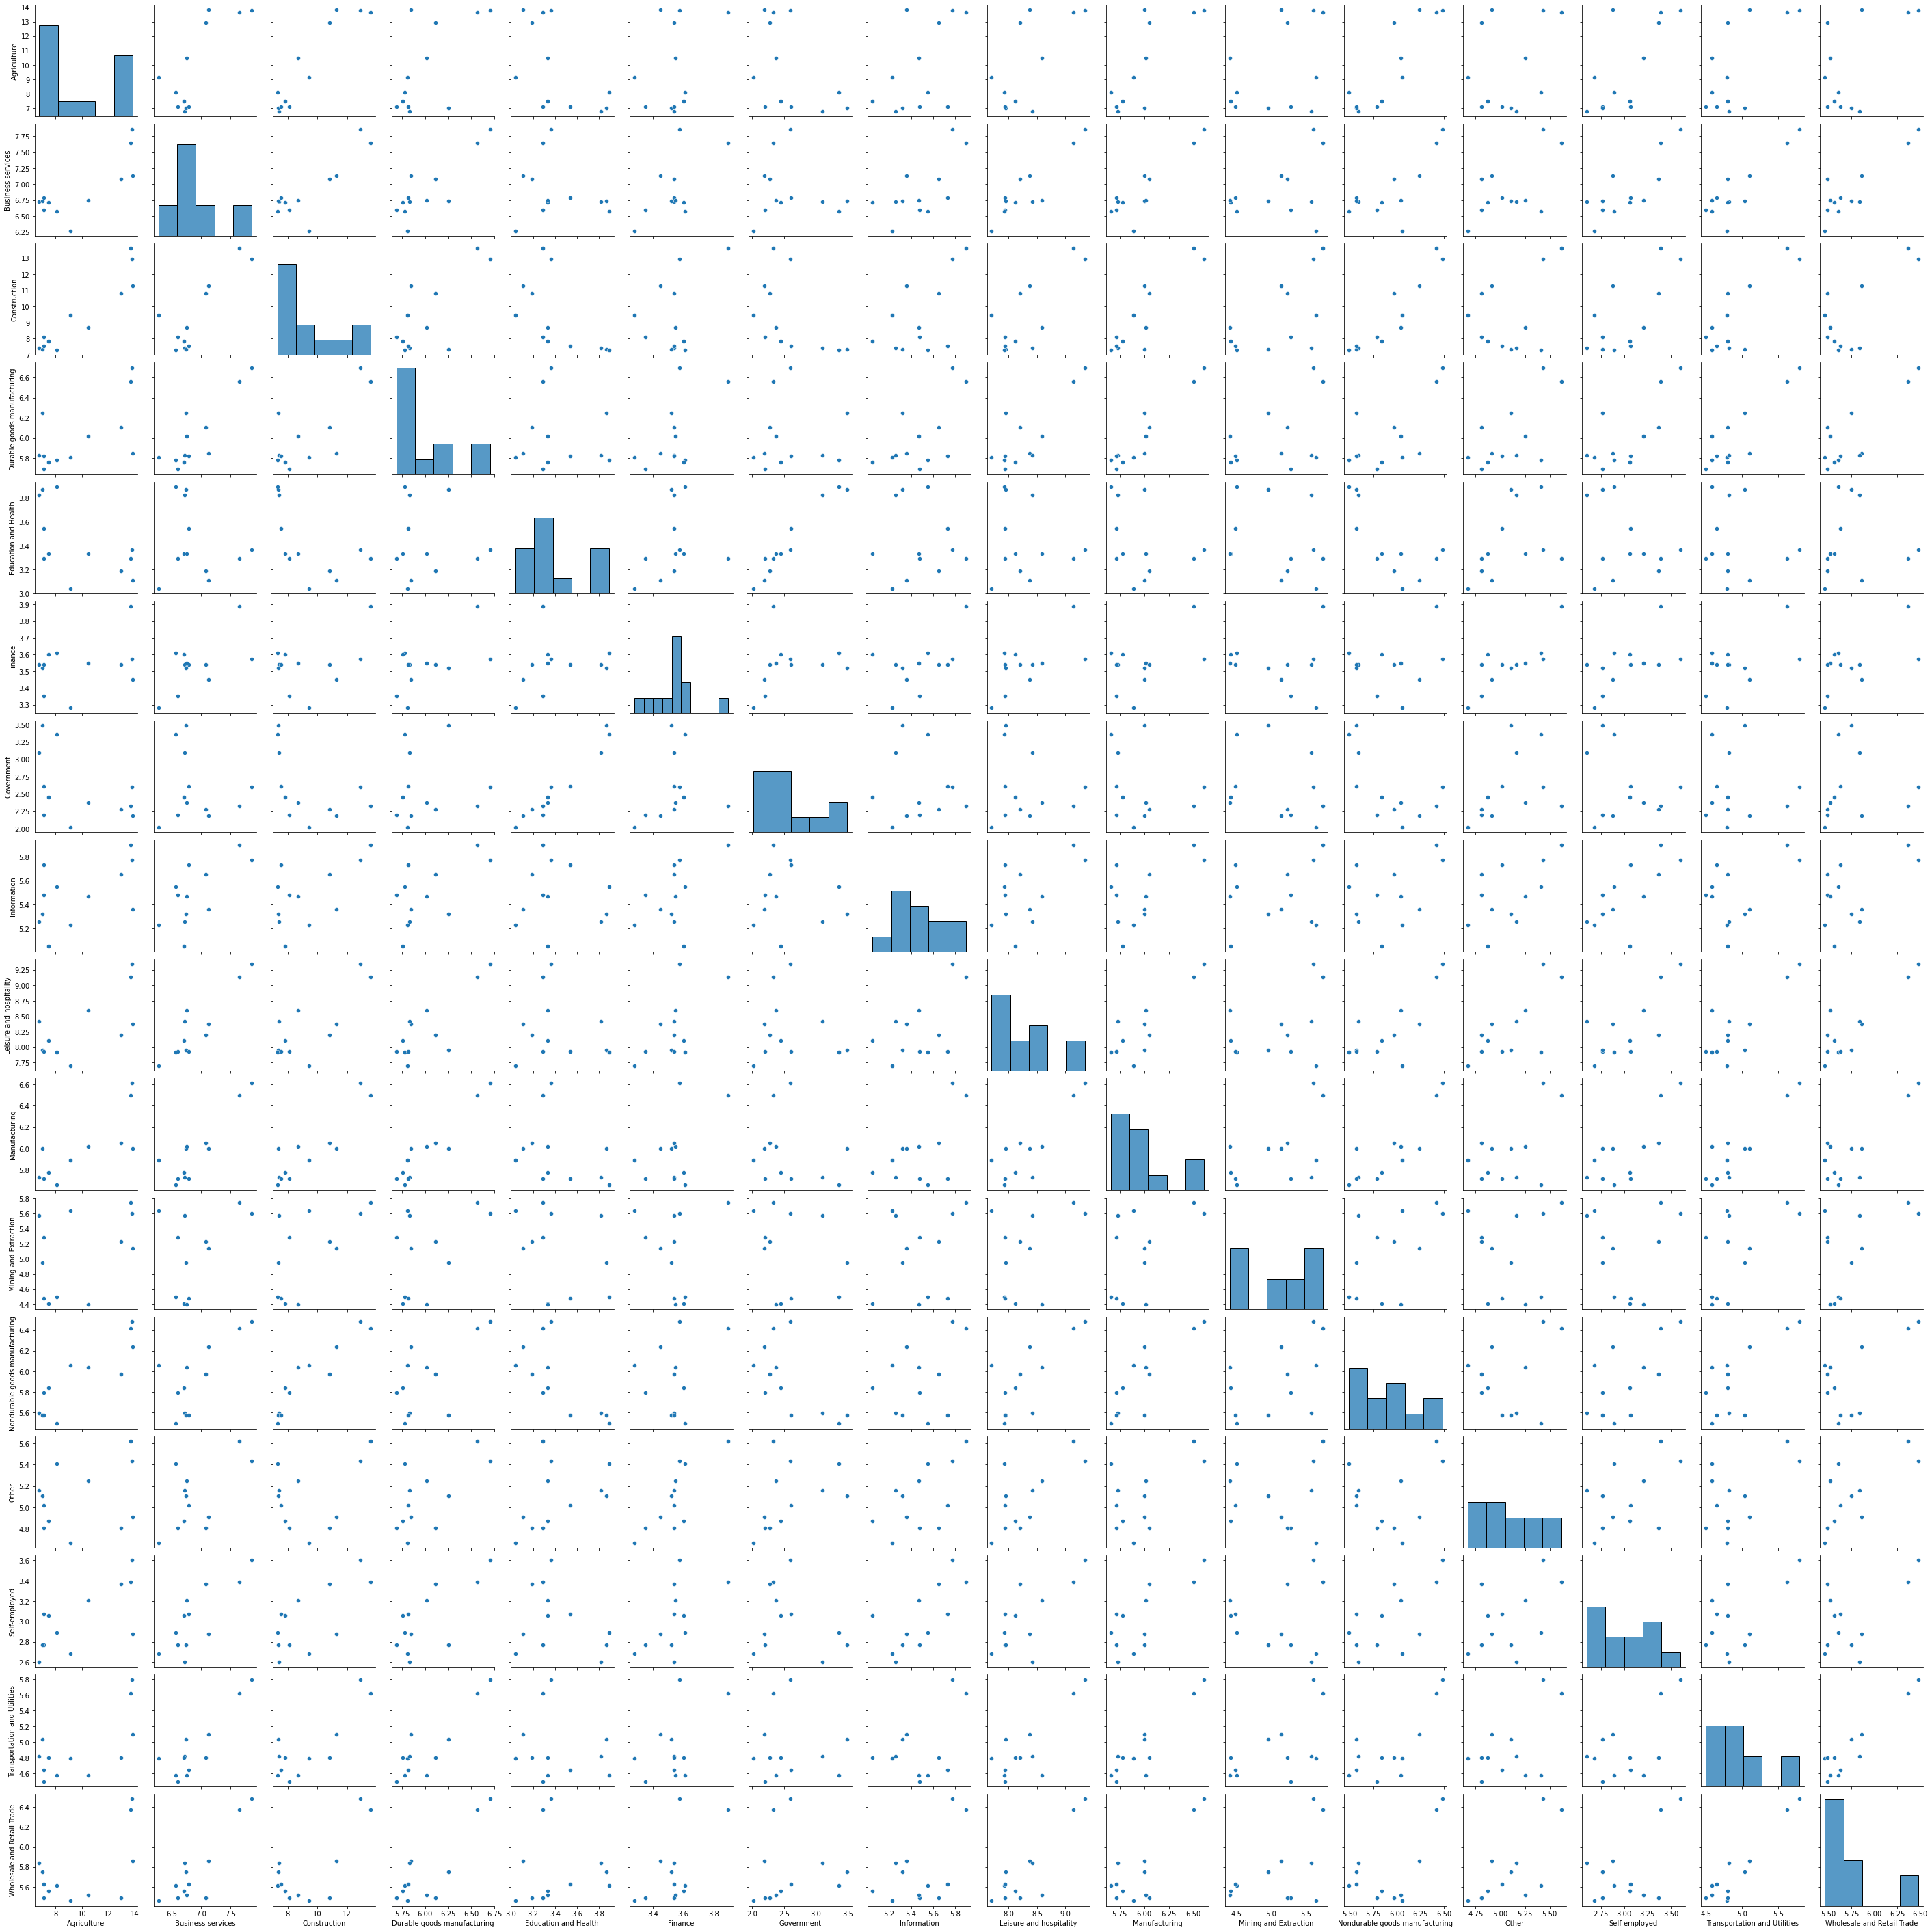

In [19]:
plt.figure(figsize=(15,10))
sns.pairplot(df_month)
plt.show()

# EXERCISE 2: GROCERIES

In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [24]:
transactions = []
length=0
dataset = open("C:\\Users\Pravallika Gajul\Desktop\groceries.txt", "r")
Content = dataset.read()
CoList = Content.split("\n")
for i in CoList:
    if i:
        length += 1
length

9835

QUESTION 2

In [27]:
transactions = []
dataset = open("C:\\Users\Pravallika Gajul\Desktop\groceries.txt", "r")
for i in dataset:
    transactions.append(i.split(sep=','))
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups\n'],
 ['tropical fruit', 'yogurt', 'coffee\n'],
 ['whole milk\n'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads\n'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product\n'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner\n'],
 ['rolls/buns\n'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)\n'],
 ['pot plants\n'],
 ['whole milk', 'cereals\n'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate\n'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes\n'],
 ['beef\n'],
 ['frankfurter', 'rolls/buns', 'soda\n'],
 ['chicken', 'tropical fruit\n'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers\n'],
 ['fruit/vegetable juice\n'],
 ['packaged fruit/vegetables\n'],
 ['chocolate\n'],
 ['specialty bar\n'

In [28]:
for c in transactions:
    c[-1]=c[-1].rstrip('\n')
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

QUESTION 3

In [29]:
 te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


QUESTION 4

In [32]:
freq0 = apriori(df, min_support=0.02, use_colnames=True)
freq0['length'] = freq0['itemsets'].apply(lambda x: len(x))
freq0[freq0.support==freq0.support.max()]

,support,itemsets,length
57,0.255516,(whole milk),1


QUESTION 5

In [33]:
freq = apriori(df, min_support=0.05, use_colnames=True)
freq['length'] = freq['itemsets'].apply(lambda x: len(x))
freq

,support,itemsets,length
0,0.052466,(beef),1
1,0.080529,(bottled beer),1
2,0.110524,(bottled water),1
3,0.064870,(brown bread),1
4,0.055414,(butter),1
5,0.077682,(canned beer),1
6,0.082766,(citrus fruit),1
7,0.058058,(coffee),1
8,0.053279,(curd),1
9,0.063447,(domestic eggs),1


QUESTION 6

In [34]:
freq0[freq0.length==2]

,support,itemsets,length
59,0.021251,"(beef, whole milk)",2
60,0.020437,"(bottled beer, whole milk)",2
61,0.024809,"(other vegetables, bottled water)",2
62,0.024199,"(rolls/buns, bottled water)",2
63,0.028978,"(bottled water, soda)",2
...,...,...,...
115,0.042298,"(tropical fruit, whole milk)",2
116,0.029283,"(tropical fruit, yogurt)",2
117,0.032232,"(whipped/sour cream, whole milk)",2
118,0.020742,"(whipped/sour cream, yogurt)",2


61 itemsets found with min support 2% and length 2

QUESTION 7

In [35]:
association_rules(freq0, metric="confidence", min_threshold=0).sort_values('confidence',ascending=False,ignore_index=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
1,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817
2,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085
3,"(other vegetables, root vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
4,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
5,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030
6,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
8,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
9,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,0.008149,1.294636


QUESTION 8

In [36]:
asscn=association_rules(freq0, metric="confidence", min_threshold=0)
asscn[asscn.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
1,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
4,(other vegetables),(bottled water),0.193493,0.110524,0.024809,0.128219,1.160101,0.003424,1.020297
5,(bottled water),(other vegetables),0.110524,0.193493,0.024809,0.224471,1.160101,0.003424,1.039945
6,(rolls/buns),(bottled water),0.183935,0.110524,0.024199,0.131564,1.190373,0.003870,1.024228
...,...,...,...,...,...,...,...,...,...
129,"(yogurt, whole milk)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511
130,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
131,(whole milk),"(other vegetables, yogurt)",0.255516,0.043416,0.022267,0.087147,2.007235,0.011174,1.047905
132,(other vegetables),"(yogurt, whole milk)",0.193493,0.056024,0.022267,0.115081,2.054131,0.011427,1.066737
